# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [89]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [95]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

622
622


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
city_weather = pd.DataFrame({'City': cities,
                             'Country': countries,
                             'Lat': '', 
                             'Lng': '',
                             'Max Temp': '',
                             'Humidity': '', 
                             'Cloudiness': '',
                             'Windspeed': '',
                             'Date': '',})

record_num = 1
record_set = 1

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

print('''
Beginning Data Retrieval
-----------------------------''')


for index, row in city_weather.iterrows(): 
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    response = requests.get(query_url).json()
    
    try: 
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Dikson
Processing Weather Data for Record 2 of Set 1 | São João da Barra
Processing Weather Data for Record 3 of Set 1 | Tuktoyaktuk
Processing Weather Data for Record 4 of Set 1 | Tiksi
Processing Weather Data for Record 5 of Set 1 | Punta Arenas
Processing Weather Data for Record 6 of Set 1 | Darhan
Processing Weather Data for Record 7 of Set 1 | Haren
Processing Weather Data for Record 8 of Set 1 | Kavieng
Processing Weather Data for Record 9 of Set 1 | Burns Lake
Processing Weather Data for Record 10 of Set 1 | Jamestown
Processing Weather Data for Record 11 of Set 1 | Lucknow
Processing Weather Data for Record 12 of Set 1 | Yar-Sale
Processing Weather Data for Record 13 of Set 1 | Palāsa
Processing Weather Data for Record 14 of Set 1 | Qaanaaq
Processing Weather Data for Record 15 of Set 1 | Borger
Processing Weather Data for Record 16 of Set 1 | Hermanus
Processing Weather Data

Processing Weather Data for Record 32 of Set 3 | San Rafael
Processing Weather Data for Record 33 of Set 3 | Lakes Entrance
City not found....Skipping............
Processing Weather Data for Record 34 of Set 3 | Raudeberg
Processing Weather Data for Record 35 of Set 3 | Santa Maria
Processing Weather Data for Record 36 of Set 3 | Matara
Processing Weather Data for Record 37 of Set 3 | Camacha
Processing Weather Data for Record 38 of Set 3 | Angoche
Processing Weather Data for Record 39 of Set 3 | Camacupa
Processing Weather Data for Record 40 of Set 3 | Lebu
Processing Weather Data for Record 41 of Set 3 | Petauke
Processing Weather Data for Record 42 of Set 3 | Cabo San Lucas
Processing Weather Data for Record 43 of Set 3 | Kruisfontein
Processing Weather Data for Record 44 of Set 3 | Aksu
Processing Weather Data for Record 45 of Set 3 | Campina Grande do Sul
Processing Weather Data for Record 46 of Set 3 | Shingū
Processing Weather Data for Record 47 of Set 3 | Lubango
Processing Wea

Processing Weather Data for Record 12 of Set 6 | Seydi
Processing Weather Data for Record 13 of Set 6 | Sola
Processing Weather Data for Record 14 of Set 6 | Tsotíli
Processing Weather Data for Record 15 of Set 6 | Huarmey
Processing Weather Data for Record 16 of Set 6 | Victor Harbor
Processing Weather Data for Record 17 of Set 6 | Luena
Processing Weather Data for Record 18 of Set 6 | Pochutla
Processing Weather Data for Record 19 of Set 6 | Sterling
Processing Weather Data for Record 20 of Set 6 | Lucapa
City not found....Skipping............
Processing Weather Data for Record 21 of Set 6 | Xining
Processing Weather Data for Record 22 of Set 6 | Coquimbo
Processing Weather Data for Record 23 of Set 6 | Russell
Processing Weather Data for Record 24 of Set 6 | Katherine
Processing Weather Data for Record 25 of Set 6 | Siderópolis
Processing Weather Data for Record 26 of Set 6 | Xiongzhou
Processing Weather Data for Record 27 of Set 6 | Gorom-Gorom
Processing Weather Data for Record 28

Processing Weather Data for Record 47 of Set 8 | Fengkou
Processing Weather Data for Record 48 of Set 8 | Birjand
Processing Weather Data for Record 49 of Set 8 | Quatre Cocos
Processing Weather Data for Record 50 of Set 8 | San Cristobal
City not found....Skipping............
Processing Weather Data for Record 1 of Set 9 | Mēga
Processing Weather Data for Record 2 of Set 9 | Tilichiki
Processing Weather Data for Record 3 of Set 9 | Road Town
Processing Weather Data for Record 4 of Set 9 | Taunggyi
Processing Weather Data for Record 5 of Set 9 | Guerrero Negro
Processing Weather Data for Record 6 of Set 9 | Cidreira
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 7 of Set 9 | Kuusamo
Processing Weather Data for Record 8 of Set 9 | Saldanha
Processing Weather Data for Record 9 of Set 9 | Qaqortoq
Processing Weather Data for Record 10 of Set 9 | Presidencia Roque Sáenz Peña
Processing Weather Data for Record 11 of Set 9 | L

Processing Weather Data for Record 26 of Set 11 | Popondetta
Processing Weather Data for Record 27 of Set 11 | Shiyan
Processing Weather Data for Record 28 of Set 11 | Santa Cruz de La Palma
Processing Weather Data for Record 29 of Set 11 | Médéa
Processing Weather Data for Record 30 of Set 11 | Saint-François
Processing Weather Data for Record 31 of Set 11 | Aktas
Processing Weather Data for Record 32 of Set 11 | Bud
Processing Weather Data for Record 33 of Set 11 | Jiaojiang
Processing Weather Data for Record 34 of Set 11 | Alofi
Processing Weather Data for Record 35 of Set 11 | Komsomol'skiy
Processing Weather Data for Record 36 of Set 11 | Juegang
Processing Weather Data for Record 37 of Set 11 | Beihai
Processing Weather Data for Record 38 of Set 11 | Pedreiras
Processing Weather Data for Record 39 of Set 11 | Phalaborwa
Processing Weather Data for Record 40 of Set 11 | Gizo Government Station
Processing Weather Data for Record 41 of Set 11 | Kajaani
Processing Weather Data for Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
#city_weather["Lat"] = city_weather.Lat.astype(float)
city_weather = city_weather.rename(columns={"Max Temp":"Max_Temp"})
city_weather["Lat"] = pd.to_numeric(city_weather.Lat, errors='coerce')
city_weather["Lng"] = pd.to_numeric(city_weather.Lng, errors='coerce')
city_weather["Max_Temp"] = pd.to_numeric(city_weather.Max_Temp, errors='coerce')
city_weather["Humidity"] = pd.to_numeric(city_weather.Humidity, errors='coerce')
city_weather["Cloudiness"] = pd.to_numeric(city_weather.Cloudiness, errors='coerce')
city_weather["Windspeed"] = pd.to_numeric(city_weather.Windspeed, errors='coerce')
city_weather["Date"] = pd.to_numeric(city_weather.Date, errors='coerce')

city_weather.dtypes

City           object
Country        object
Lat           float64
Lng           float64
Max_Temp      float64
Humidity      float64
Cloudiness    float64
Windspeed     float64
Date          float64
dtype: object

In [98]:
city_weather.to_csv("../Output_data/CityWeatherData.csv", index=False, header=True)
city_weather.head()

,City,Country,Lat,Lng,Max_Temp,Humidity,Cloudiness,Windspeed,Date
0,dikson,RU,73.51,80.55,41.45,83.0,0.0,15.59,1.590129e+09
1,sao joao da barra,BR,-21.64,-41.05,69.55,85.0,0.0,9.62,1.590129e+09
2,tuktoyaktuk,CA,69.45,-133.04,32.31,98.0,100.0,9.08,1.590129e+09
3,tiksi,RU,71.69,128.87,32.56,95.0,95.0,4.09,1.590129e+09
4,punta arenas,CL,-53.15,-70.92,41.00,80.0,75.0,8.05,1.590129e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [99]:
city_weather['Humidity'].max()

100.0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

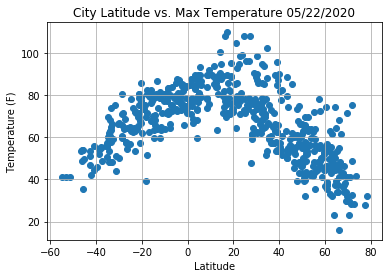

In [100]:
plt.scatter(city_weather["Lat"], city_weather["Max_Temp"], marker="o")
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

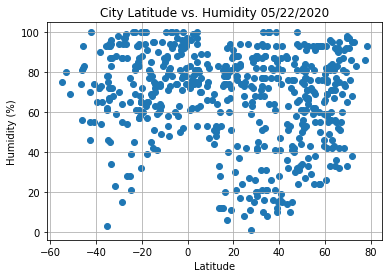

In [101]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

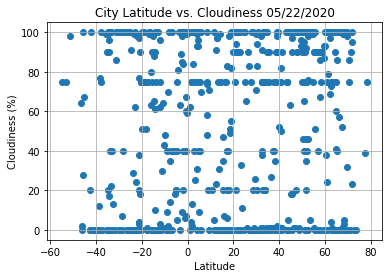

In [102]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

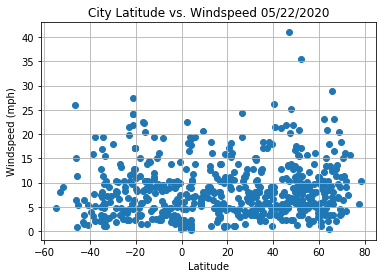

In [103]:
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")
plt.title(f'City Latitude vs. Windspeed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [104]:
# OPTIONAL: Create a function to create Linear Regression plots

In [105]:
# Create Northern and Southern Hemisphere DataFrames

nh = city_weather.loc[city_weather['Lat'] >= 0]
sh = city_weather.loc[city_weather['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7721427912073296


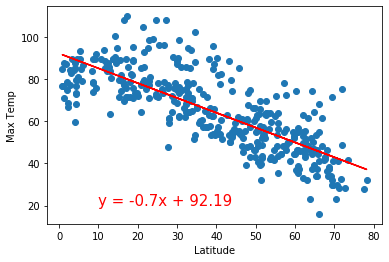

In [106]:
x_values = nh['Lat']
y_values = nh['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7628501185596351


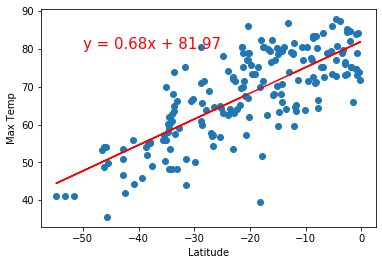

In [107]:
x_values = sh['Lat']
y_values = sh['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024159923986424102


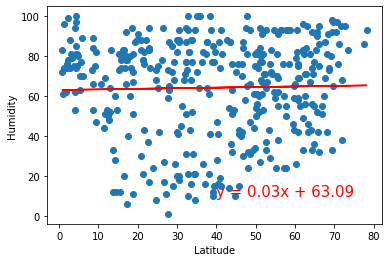

In [108]:
x_values = nh['Lat']
y_values = nh['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1617823158606846


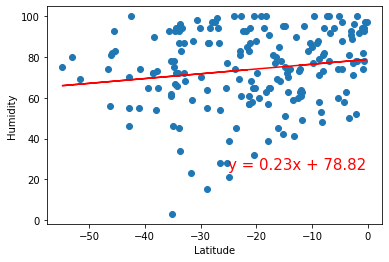

In [109]:
x_values = sh['Lat']
y_values = sh['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09825148221638526


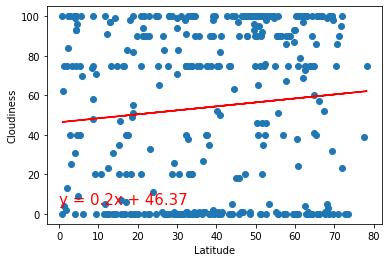

In [110]:
x_values = nh['Lat']
y_values = nh['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0230122891971179


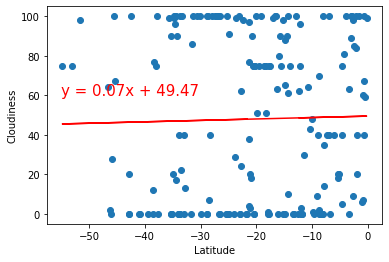

In [111]:
x_values = sh['Lat']
y_values = sh['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07280908049536768


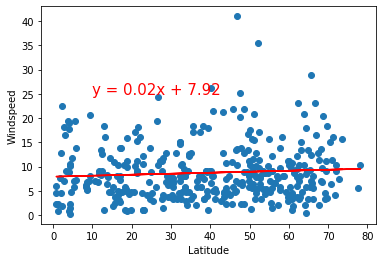

In [112]:
x_values = nh['Lat']
y_values = nh['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.024709562028422064


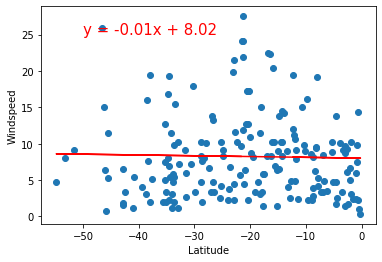

In [113]:
x_values = sh['Lat']
y_values = sh['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue}")
plt.show()